# Análise de vinhos 🍷

## Sobre o dataset
O dataset é composto por informações sobre características químicas de diferentes tipos de vinho, branco ou tinto.
- Type: indica se o vinho é branco ou tinto;
- Fixed acidity: a quantidade de ácidos não volatéis (g/L);
- Volatile acidity: a quantidade de ácidos volatéis (g/L);
- Citric acid: a quantidade de ácido cítrico (g/L);
- Residual sugar: a quantidade de açúcar residual (g/L);
- Chlorides: a quantidade de cloretos (g/L);
- Free sulfur dioxide: a quantidade de dióxido de enxofre livre (mg/L);
- Total sulfur dioxide: a quantidade total de dióxido de enxofre (mg/L);
- Density: a densidade do vinho (g/cm³);
- pH: o nível de pH do vinho;
- Sulphates: a quantidade de sulfatos (g/L);
- Alcohol: o teor alcoólico do vinho (%vol);
- Quality: a avaliação do vinho (0-10)

# ----------------------------------------------------------------------------------

# Análise dos dados contidos no dataset

In [1]:
# importação das bibliotecas principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# importação do dataset a ser utilizado
df = pd.read_csv('../dataset/VinhoClassReg.csv')

In [3]:
# visualização das primeiras linhas para compreender melhor a estrutura do dataset
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# visualização das estatísticas de cada uma das características químicas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# pesquisa de valores nulos no dataset que possam interferir na análise dos dados 
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Interpretação dos resultados obtidos: 
- existem valores nulos nas colunas fixed acidity (10), volatile acidity (8), citric acid (3), residual sugar (2) e chlorides (2)
- uma vez que o número de valores nulos é resíduo em todas as colunas em que foram encontrados nulos, o próximo passo consiste em eliminar as linhas com valores nulos.

In [6]:
# remoção de linhas com valores nulos
df = df.dropna()

In [7]:
# nova pesquisa de valores nulos para confirmar que o passo anterior ocorreu com sucesso
print(df.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
# visualização dos formatos em que as características estão
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


### Interpretação dos resultados obtidos:
- a maior parte das categorias encontra-se num formato numérico (float64 ou int64). Isto vai ser relevante para a análise exploratória de dados;
- como o atributo Type é importante para a distinção dos vinhos e encontra-se no formato object, é necessário convertê-lo para facilitar a análise. Dado que só existem duas possibilidades (white ou red), a conversão pode ser feita através do LabelEncoder.

In [9]:
# inicialização do LabelEncoder
label_encoder = LabelEncoder()

# Ajustar e transformar a coluna 'type'
df['type'] = label_encoder.fit_transform(df['type'])

In [10]:
# confirmação do passo anterior
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   int64  
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


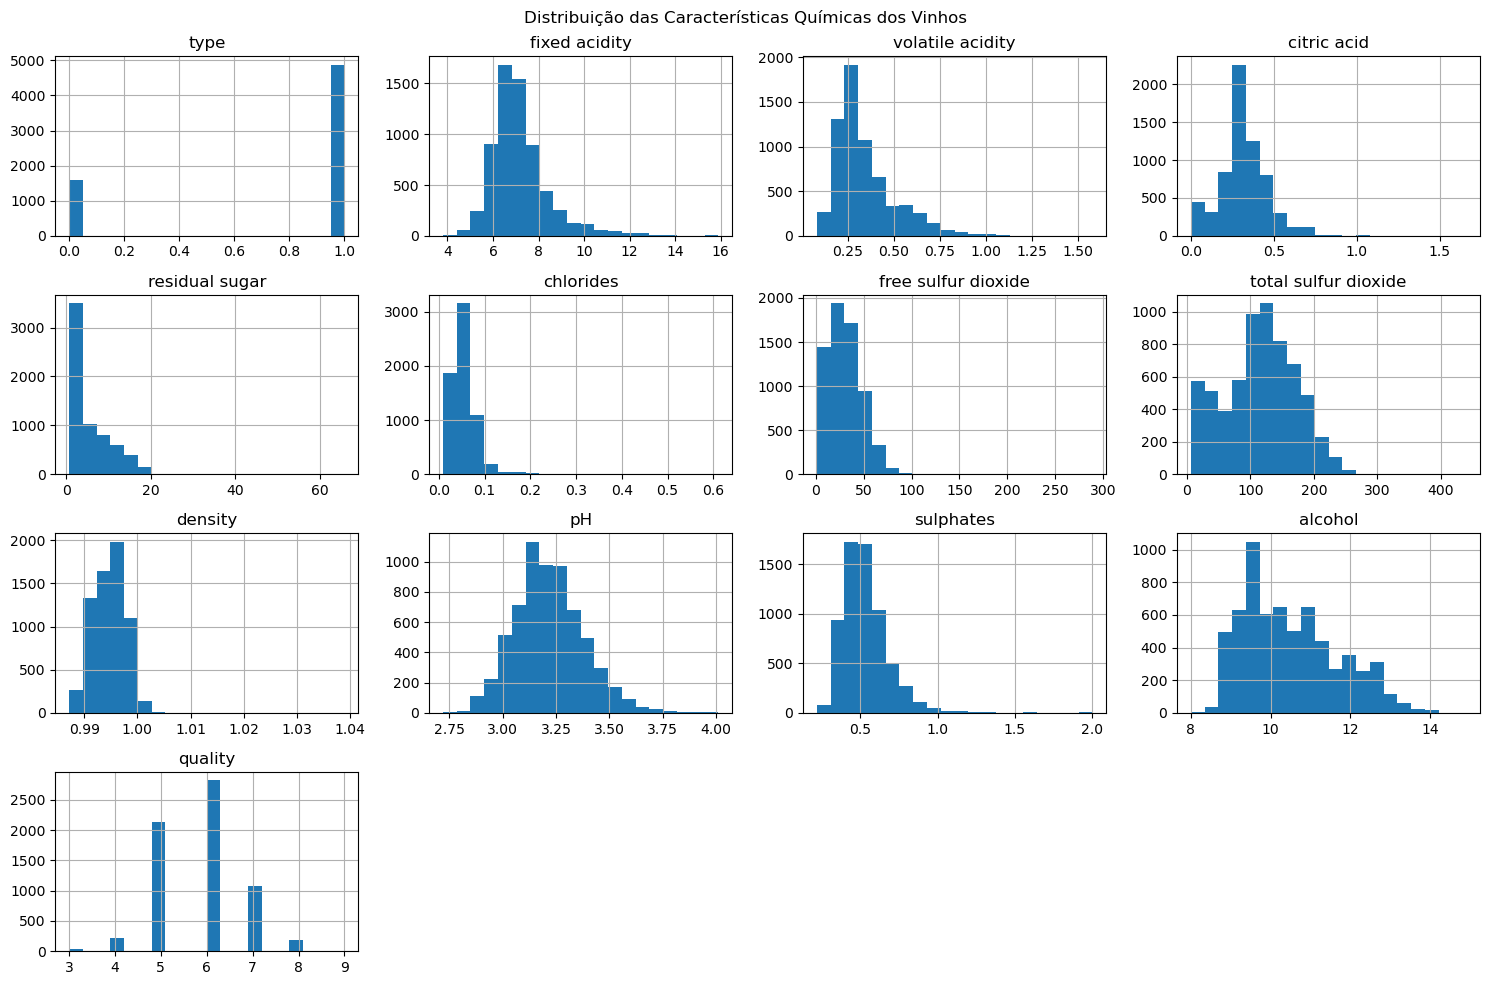

In [11]:
# Distribuição das Características
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuição das Características Químicas dos Vinhos')
plt.tight_layout()
plt.show()

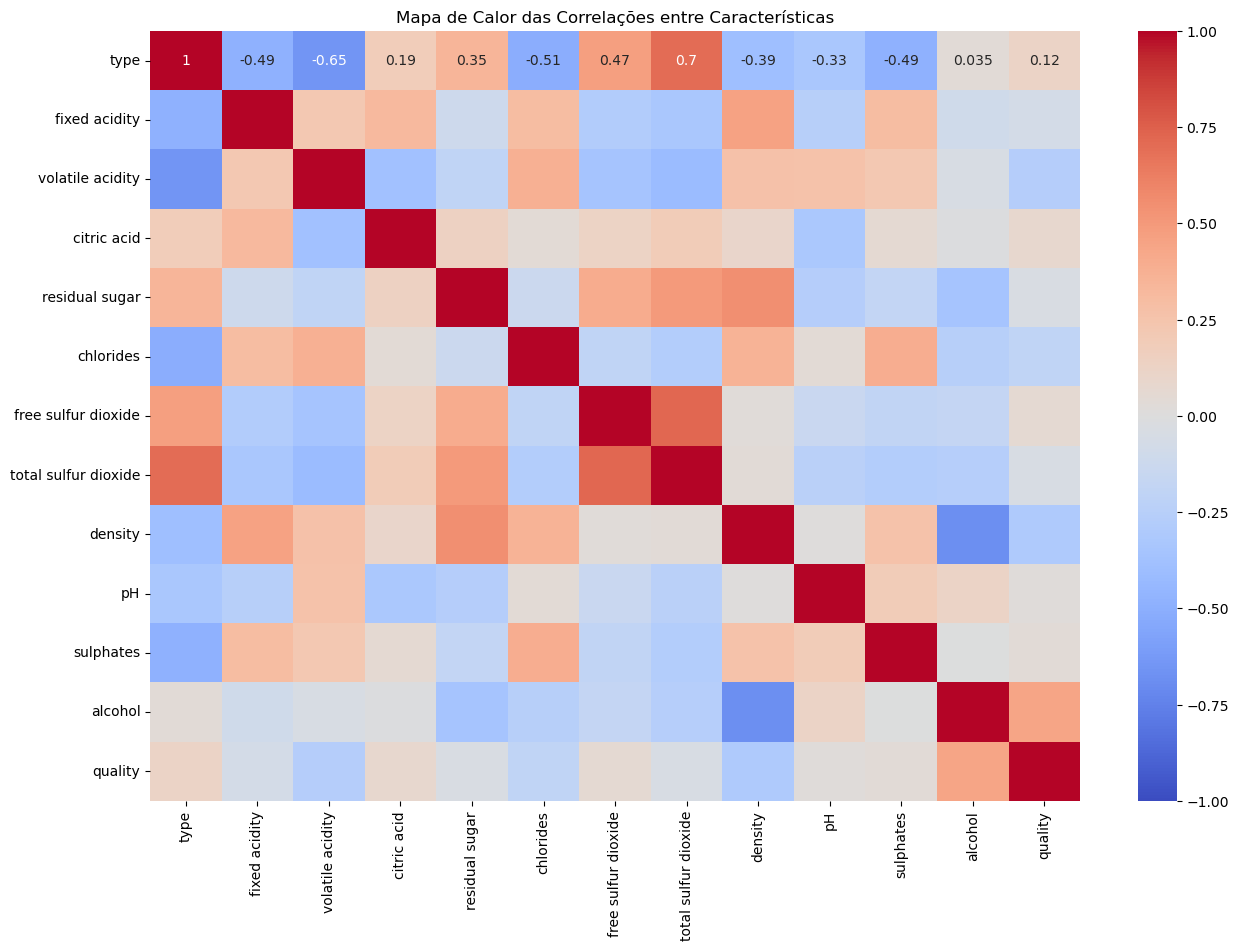

In [12]:
# Análise de Correlação
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor das Correlações entre Características')
plt.show()

In [13]:
# Estatísticas descritivas para vinhos brancos
print("Estatísticas descritivas para vinhos brancos")
print(df[df['type'] == 0].describe())

Estatísticas descritivas para vinhos brancos
         type  fixed acidity  volatile acidity  citric acid  residual sugar  \
count  1593.0    1593.000000       1593.000000  1593.000000     1593.000000   
mean      0.0       8.326365          0.527659     0.271551        2.538512   
std       0.0       1.740681          0.179297     0.194843        1.412061   
min       0.0       4.600000          0.120000     0.000000        0.900000   
25%       0.0       7.100000          0.390000     0.090000        1.900000   
50%       0.0       7.900000          0.520000     0.260000        2.200000   
75%       0.0       9.200000          0.640000     0.420000        2.600000   
max       0.0      15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1593.000000          1593.000000           1593.000000  1593.000000   
mean      0.087497            15.841808             46.463905     0.996752   
std      

In [14]:
# Estatísticas descritivas para vinhos tintos
print("Estatísticas descritivas para vinhos tintos")
print(df[df['type'] == 1].describe())

Estatísticas descritivas para vinhos tintos
         type  fixed acidity  volatile acidity  citric acid  residual sugar  \
count  4870.0    4870.000000       4870.000000  4870.000000     4870.000000   
mean      1.0       6.855123          0.278071     0.334199        6.394343   
std       0.0       0.843444          0.100528     0.120915        5.070853   
min       1.0       3.800000          0.080000     0.000000        0.600000   
25%       1.0       6.300000          0.210000     0.270000        1.700000   
50%       1.0       6.800000          0.260000     0.320000        5.200000   
75%       1.0       7.300000          0.320000     0.390000        9.900000   
max       1.0      14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4870.000000          4870.000000           4870.000000  4870.000000   
mean      0.045771            35.317146            138.340144     0.994026   
std       

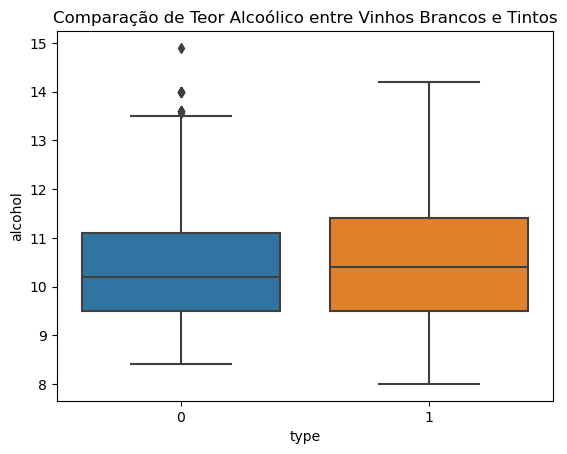

In [15]:
# comparação dos tipos de vinho com o teor alcoólico
sns.boxplot(x='type', y='alcohol', data=df)
plt.title('Comparação de Teor Alcoólico entre Vinhos Brancos e Tintos')
plt.show()

### Interpretação dos resultados obtidos:
- Apesar dos intervalos de teor alcoólico dos dois tipos de vinho compreenderem valores semelhantes, o intervalo de valores dos vinhos tintos é maior. Deste modo, é possível concluir que os vinhos tintos têm um teor alcoólico superior aos vinhos brancos.

/Users/miguelamoreira/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miguelamoreira/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/miguelamoreira/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miguelamoreira/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

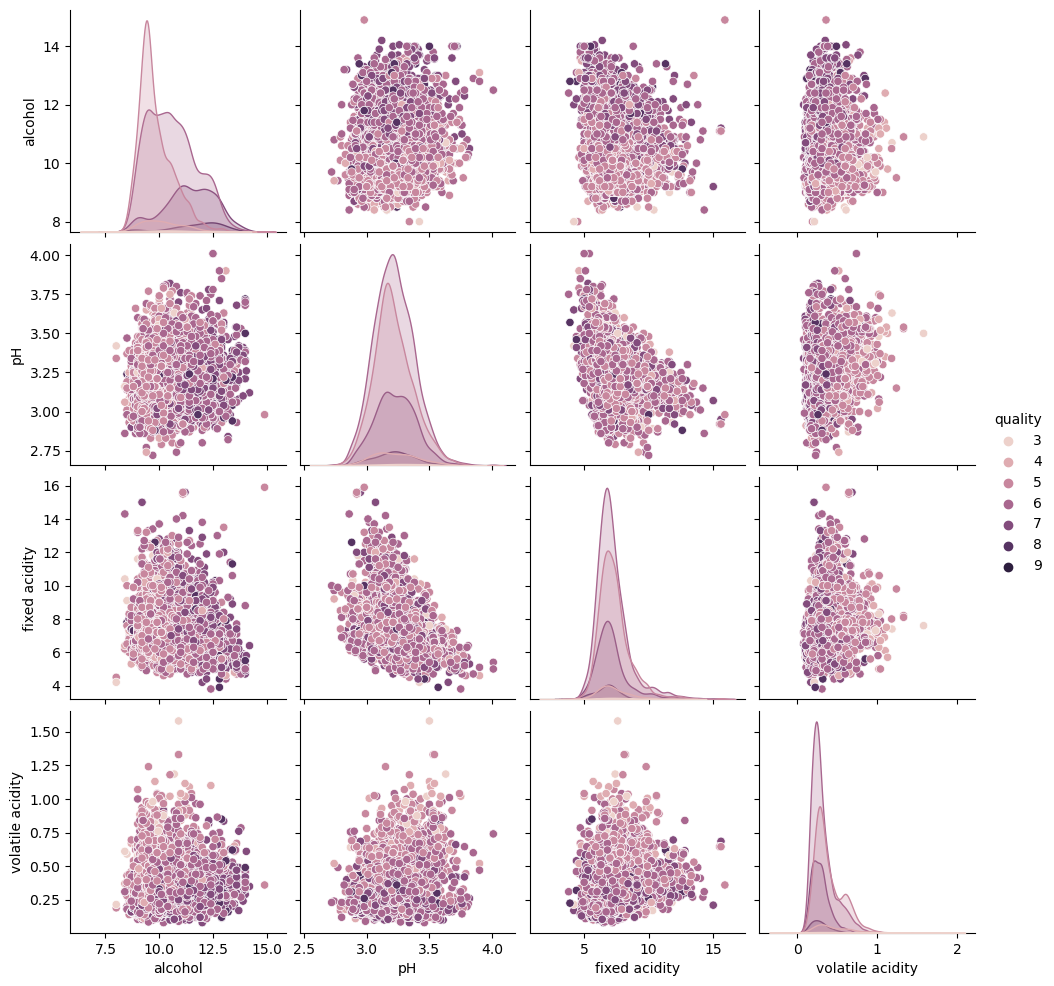

In [16]:
# Relação entre variáveis e qualidade
sns.pairplot(df, vars=['alcohol', 'pH', 'fixed acidity', 'volatile acidity'], hue='quality')
plt.show()

# Pré-processamento

In [17]:
# definição das variáveis X (atributos) e y (tipo de vinho)
X = df.drop('type', axis=1)
y = df['type']

In [18]:
# divisão dos valores a serem utilizados para teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# estandardização dos valores dos atributos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classificação 